# Лабораторна робота №1. Дослідження директорної антени.
Лесняк Андрій, 569Мн;  
5 варіант.  

Частота f = 480 МГц  
Число елементів антени N = 12

In [292]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c as light_speed
# from scipy.signal import argelextrema

Ініціалізуємо списки та змінні

In [293]:
FC = [1] # ДС в площині Н
FE = [1] # ДС в площині Е
F1E = [1] # ДС в площинах Е та Н

steps = [0] # кути θ
SGP1 = 0 # Ширина головної пелюстки в площині FH
SGP2 = 0 # Ширина головної пелюстки в площині FН

Zeros = [] # нульові кути

In [294]:
N = 12 # Кількість елементів
F = 480e6 # Частота в Гц

wavelength = round(light_speed / F, 4) # довжина хвилі
dcp = round(0.25 * wavelength, 4) # 
k = round((2 * np.pi) / wavelength, 4) # хвильове число

print(f"λ = {wavelength} m")
print(f"dcp = {dcp} m")
print(f"k = {k} rad/m")


# wavelength = light_speed / F
# dcp = 0.25 * wavelength
# k = (2 * np.pi) / wavelength

# print(f"λ = {round(wavelength, 4)} m")
# print(f"dcp = {round(dcp, 4)} m")
# print(f"k = {round(k, 4)} rad/m")

λ = 0.6246 m
dcp = 0.1562 m
k = 10.0595 rad/m


Обчислення мінімальних кутів θ

In [295]:
# Створюємо масив для 'i' та обчислюємо кути θ векторизовано, попередньо обмеживши значення в межах [-1, 1]
i_values = np.arange(1, 10)
argument = np.clip(1 - (i_values * wavelength) / (N * dcp), -1, 1)

# Обчислюємо кути θ з обмеженими значеннями
p_values = np.arccos(argument)

# Округлюємо кути
theta_min = np.round(np.degrees(p_values[p_values <= np.pi / 2]), 2)

# Виводимо мінімальні кути θ
for idx, theta in enumerate(theta_min):
    print(f"θ{idx + 1} min = {theta}\u00b0")

θ1 min = 48.18°
θ2 min = 70.52°
θ3 min = 89.98°


Основний цикл для розрахунку ДС в залежності від кута θ. 

In [296]:
teta = np.arange(0.01, np.pi / 2, 0.01)  # Створюємо масив тета

# Обчислення значень ДС
mn1 = np.abs(np.cos(np.pi / 2 * np.sin(teta)) / np.cos(teta))
mn2 = np.abs(np.sin((N * k * dcp * (1 - np.cos(teta)) / 2)) / 
                   (N * np.sin((k * dcp * (1 - np.cos(teta))) / 2)))
mn3 = mn1 * mn2

# Додаємо обчислені значення в списки
F1E.extend(mn1)
FC.extend(mn2)
FE.extend(mn3)

# Визначення ширини головної пелюстки
# SGP1 = np.round(2 * np.degrees(teta[np.isclose(mn2, 0.707, atol = 0.003)]), 2) # Ширина пелюстки в FH
# SGP2 = np.round(2 * np.degrees(teta[np.isclose(mn3, 0.707, atol = 0.003)]), 2) # Ширина пелюстки в FE

Zeros = np.round(np.degrees(teta[mn2 < 0.01]))  # Визначення нульових кутів

# Записуємо кути у список steps
steps.extend(np.degrees(teta))

Точніший спосіб знайти перетини за допомогою інтерполяції

In [297]:
from scipy.interpolate import interp1d

# Інтерполюємо значення mn2 та mn3 для пошуку точних кутів
interp_mn2 = interp1d(mn2, teta, kind='linear', bounds_error=False, fill_value='extrapolate')
interp_mn3 = interp1d(mn3, teta, kind='linear', bounds_error=False, fill_value='extrapolate')

# Шукаємо точні кути, де mn2 та mn3 перетинають 0.707
SGP1_exact = interp_mn2(0.707)
SGP2_exact = interp_mn3(0.707)

# Конвертуємо знайдені кути в градуси
SGP1 = np.round(2 * np.degrees(SGP1_exact), 2)
SGP2 = np.round(2 * np.degrees(SGP2_exact), 2)

In [298]:
print(f"Значення нульових кутів: {', '.join(map(str, Zeros))} градусів")
print(f"Ширина головної пелюстки в площині FH = {SGP1}\u00b0")
print(f"Ширина головної пелюстки в площині FE = {SGP2}\u00b0")

Значення нульових кутів: 48.0, 70.0, 90.0 градусів
Ширина головної пелюстки в площині FH = 63.15°
Ширина головної пелюстки в площині FE = 54.07°


Знаходимо напрямки максимальних випромінювань $ \theta_{max} $

In [317]:
from scipy.signal import find_peaks

# Знаходимо максимуми для FC
peaks_fc, _ = find_peaks(FC)  # Знайдемо індекси максимумів для FC
teta_max_fc = np.degrees(teta[peaks_fc])  # Перетворюємо на градуси
FC_peaks = np.array(FC)[peaks_fc]  # Значення максимумів для FC

# Виводимо значення максимумів
for idx, (theta, value) in enumerate(zip(teta_max_fc, FC_peaks)):
    print(f"θ_max {idx + 1} = {theta:.2f}°; значення = {value:.3f}")

θ_max 1 = 59.01°; значення = 0.222
θ_max 2 = 80.21°; значення = 0.138


Візуалізація

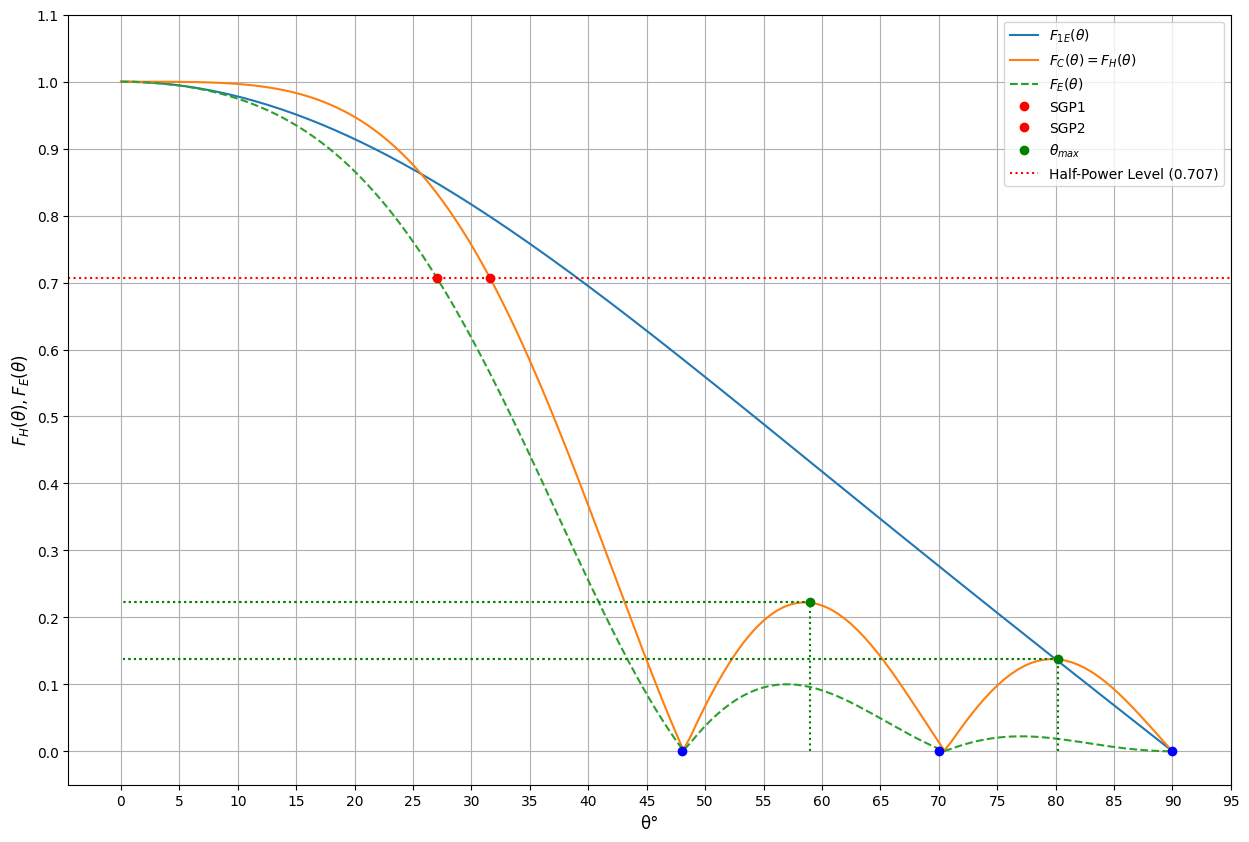

In [316]:
plt.figure(figsize=(15, 10))

plt.plot(steps, F1E, label = "$ F_{1E}(θ) $")
plt.plot(steps, FC, label = "$ F_{C}(θ) = F_{H}(θ) $")
plt.plot(steps, FE, label = "$ F_{E}(θ) $", linestyle = "dashed")

# Наносимо знайдені інтерпольовані точки
plt.plot(SGP1 / 2, 0.707, "ro", label="SGP1")
plt.plot(SGP2 / 2, 0.707, "ro", label="SGP2")

plt.plot(Zeros, [0] * len(Zeros), 'bo') # Позначаємо нулі

# Наносимо максимуми на графік
plt.plot(teta_max_fc, FC_peaks, "go", label="$ \\theta_{max} $")
# Додаємо вертикальні лінії для точок theta_max
for i in range(len(teta_max_fc)):
    plt.vlines(x=teta_max_fc[i], ymin=0, ymax=FC_peaks[i], colors='green', linestyles='dotted')
    plt.hlines(y=FC_peaks, xmin=teta_max_fc, xmax=FC_peaks[i], colors='g', linestyles='dotted')


# Позначаємо рівень половинної потужності (0.707)
plt.axhline(y = 0.707, color = "r", linestyle = "dotted", label = "Half-Power Level (0.707)")

# Задаємо розміри клітинок
plt.xticks(np.arange(0, 100, 5))
plt.yticks(np.arange(0, 1.2, 0.1)) 

# Додаємо мітки і сітку
plt.xlabel("θ" + '\u00b0', fontsize = 12)
plt.ylabel("$ F_H(θ), F_E(θ) $", fontsize = 12)
plt.legend()
plt.grid()
plt.show()